In [1]:
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb
import pandas as pd
import bioread
from scipy.fft import fft, fftfreq
from scipy import signal
from scipy.optimize import curve_fit
from scipy import signal #detrend
from scipy.signal import find_peaks

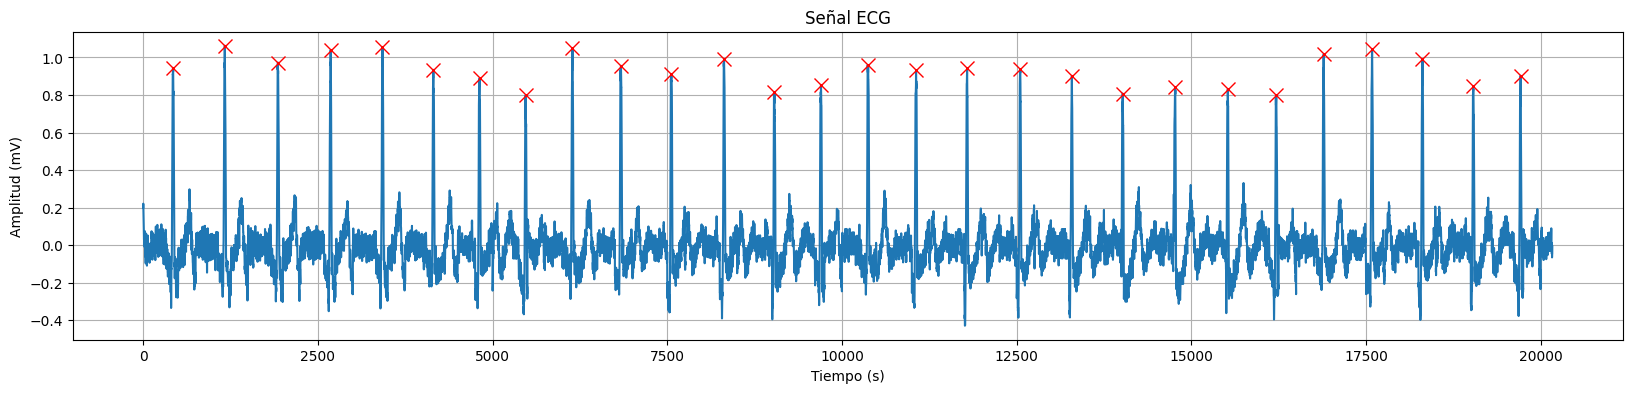

In [10]:
ECG = bioread.read_file ("/Users/paulaaguirrecarol/Desktop/Copia de 2. ecg_sinf.acq")
t = ECG.time_index.T

señal = ECG.channels[0].data
Fs = ECG.channels[0].samples_per_second
N = len(señal)
n = t*Fs

A3 = np.arange(0,N,250) #arreglo
B3 = tuple(A3) #tupla
señal_sin_tendencia = signal.detrend(señal,bp=A3)


peaks_max = find_peaks (señal_sin_tendencia,distance=500)[0]

plt.figure (figsize=(20,4))
plt.plot (n,señal_sin_tendencia)
plt.plot (n[peaks_max],señal_sin_tendencia[peaks_max],'rx',ms=10)
plt.title ('Señal ECG')
plt.xlabel ('Tiempo (s)')
plt.ylabel ('Amplitud (mV)')
plt.grid ()
plt.show ()

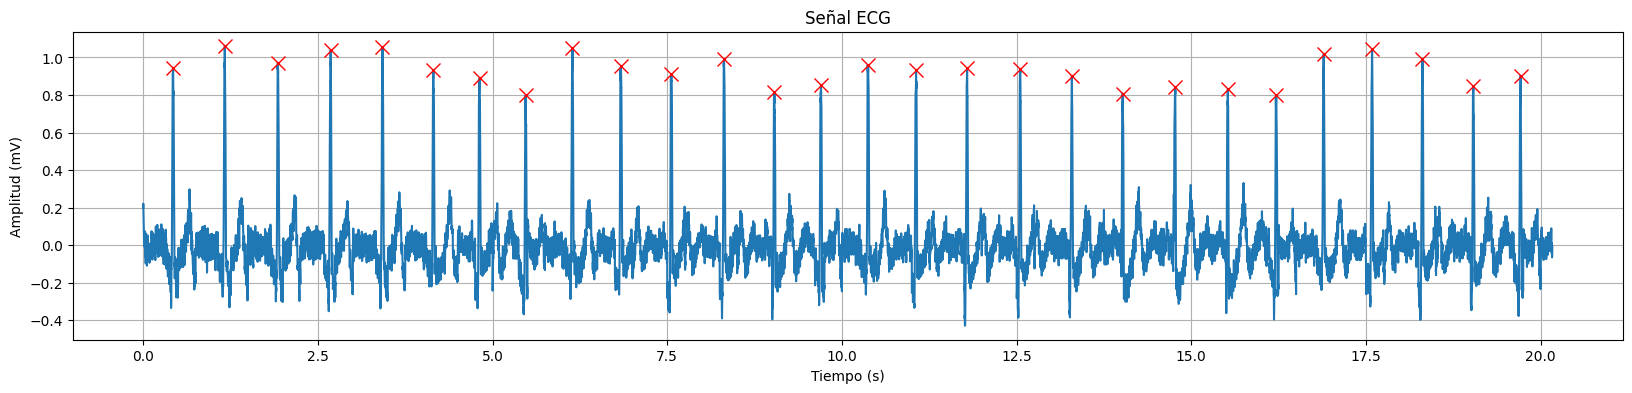

In [16]:
plt.figure (figsize=(20,4))
plt.plot (t,señal_sin_tendencia)
plt.plot (t[peaks_max],señal_sin_tendencia[peaks_max],'rx',ms=10)
plt.title ('Señal ECG')
plt.xlabel ('Tiempo (s)')
plt.ylabel ('Amplitud (mV)')
plt.grid ()
plt.show ()

In [17]:
len (peaks_max) * 3

84

In [15]:
t1 = peaks_max [0]
t2 = peaks_max [1]

total = t2-t1
frecc = 1/total
frecc

0.001349527665317139

In [18]:
def FrecuenciaCardiaca (nombreArchivo):
    ECG = bioread.read_file (nombreArchivo)
    t = ECG.time_index.T

    señal = ECG.channels[0].data
    Fs = ECG.channels[0].samples_per_second
    N = len(señal)
    n = t*Fs

    A3 = np.arange(0,N,250) #arreglo
    B3 = tuple(A3) #tupla
    señal_sin_tendencia = signal.detrend(señal,bp=A3)

    peaks_max = find_peaks (señal_sin_tendencia,distance=500)[0]

    FrecCardiaca = len (peaks_max) * 3

    return FrecCardiaca

In [19]:
FrecuenciaCardiaca ("/Users/paulaaguirrecarol/Desktop/Copia de 2. ecg_sinf.acq")

84